In [0]:
import warnings
warnings.filterwarnings('ignore')

In [0]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
import keras
from keras.models import Sequential
from keras.layers import Input, Conv2D, Convolution3D, MaxPool2D, Dense, Dropout, Flatten, Activation

Using TensorFlow backend.


#### data preparation

In [0]:
from keras.datasets import cifar10

In [6]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


In [7]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)


In [8]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)


In [0]:
# convert the label into one hot encoded
y_train = keras.utils.np_utils.to_categorical(y_train)
y_test = keras.utils.np_utils.to_categorical(y_test)

In [0]:
x_train = x_train/255.0
x_test = x_test/255.0

### CNN Model

In [20]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu',input_shape = (32, 32, 3)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(Dropout(0.25))
model.add(MaxPool2D(2, 2))
model.add(Conv2D(64, kernel_size=(5, 5), activation='relu'))
model.add(Conv2D(64, kernel_size=(5, 5), activation='relu'))
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(16, kernel_size=(3, 3), activation='relu'))

model.add(Flatten())
model.add(Dense(10, activation='softmax'))


## compile the model
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])


model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 28, 28, 64)        18496     
_________________________________________________________________
dropout_3 (Dropout)          (None, 28, 28, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 10, 10, 64)        102464    
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 6, 6, 64)          102464    
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 4, 4, 32)          18464     
__________

In [21]:
hist = model.fit(x_train,y_train,epochs=50,shuffle=True, batch_size=512, validation_split=0.135)

Train on 43250 samples, validate on 6750 samples
Epoch 1/50
43250/43250 [==============================] - 6s 134us/step - loss: 1.9151 - acc: 0.2823 - val_loss: 1.6919 - val_acc: 0.3797
Epoch 2/50
43250/43250 [==============================] - 5s 121us/step - loss: 1.5242 - acc: 0.4367 - val_loss: 1.4934 - val_acc: 0.4625
Epoch 3/50
43250/43250 [==============================] - 5s 121us/step - loss: 1.3648 - acc: 0.5051 - val_loss: 1.3279 - val_acc: 0.5308
Epoch 4/50
43250/43250 [==============================] - 5s 121us/step - loss: 1.2613 - acc: 0.5422 - val_loss: 1.2833 - val_acc: 0.5302
Epoch 5/50
43250/43250 [==============================] - 5s 122us/step - loss: 1.1768 - acc: 0.5762 - val_loss: 1.2020 - val_acc: 0.5775
Epoch 6/50
43250/43250 [==============================] - 5s 121us/step - loss: 1.1135 - acc: 0.6018 - val_loss: 1.1210 - val_acc: 0.6076
Epoch 7/50
43250/43250 [==============================] - 5s 122us/step - loss: 1.0525 - acc: 0.6252 - val_loss: 1.1133 - v

training_loss = 0.2382858657457925    val_loss = 0.8772645601696438
training_acc = 91.49826588851178    val_acc = 75.28888885709975


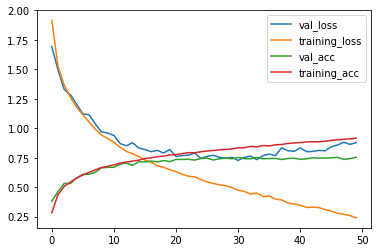

In [22]:
# plot loss
print("training_loss =", hist.history['loss'][-1],  "   val_loss =", hist.history['val_loss'][-1])
print("training_acc =", hist.history['acc'][-1]*100, "   val_acc =", hist.history['val_acc'][-1]*100)
plt.plot(hist.history['val_loss'], label='val_loss')
plt.plot(hist.history['loss'], label='training_loss')

# plot accuracy
plt.plot(hist.history['val_acc'], label='val_acc')
plt.plot(hist.history['acc'], label='training_acc')
plt.legend()
plt.show()

In [23]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 119us/step


[0.8997683685779572, 0.7433]